## **Task 1**

### **Linear Regression**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
raw_data = pd.read_csv('studentdata.csv')
raw_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
type(raw_data)

pandas.core.frame.DataFrame

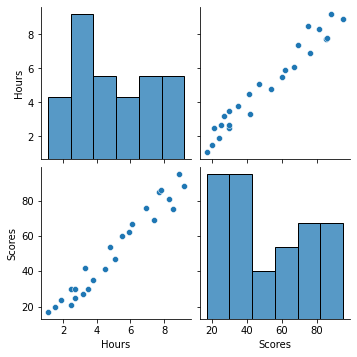

In [7]:
sns.pairplot(raw_data)

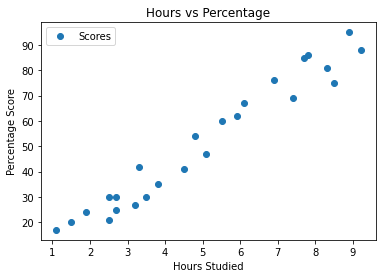

In [8]:
raw_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

*From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.*

### **Preparing the data**

In [9]:
x = raw_data['Hours']
y = raw_data['Scores']

In [10]:
type(x)

pandas.core.series.Series

As shown above the data is in the form of a pandas series. `Scikit model.fit()` function cannot use a pandas series datatype. Hence we will need to convert it into a numpy array as and when we need to pass the data to scikit function.

We import the linear regression function and rename it as model

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  

The next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

Here we convert the pandas series to a numpy array and reshape the 1D array so that it can pass to the `LinearRegression()`   function

In [13]:
X_train = X_train.to_numpy()
X_train = X_train.reshape(-1, 1)
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1, 1)

### **Training the Algorithm**


In [14]:
regressor.fit(X_train, y_train)

LinearRegression()

Here we plot the regression line

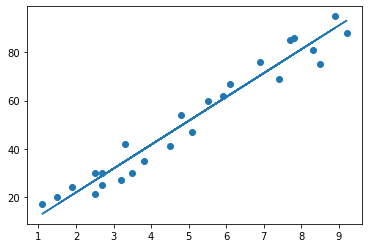

In [15]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

### **Making Predictions**

In [16]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [18]:
a = np.array(9.25)
a1 = a.reshape(1, -1)

In [19]:
predictions = regressor.predict(a1)

In [20]:
predictions

array([93.69173249])

In [21]:
print("No of Hours = {}".format(a1[0,0]))
print("Predicted Score = {}".format(predictions[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### **Evaluating the model**


In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
